In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("spam.csv",encoding="cp1252")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1926,ham,Dont give a monkeys wot they think and i certa...,NaN,NaN,NaN
4688,ham,"Didn't try, g and I decided not to head out",NaN,NaN,NaN
509,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,NaN,NaN,NaN
2900,spam,Ur cash-balance is currently 500 pounds - to m...,NaN,NaN,NaN
4091,ham,I remain unconvinced that this isn't an elabor...,NaN,NaN,NaN


In [4]:
df.shape

(5772, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5772 entries, 0 to 5771
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5772 non-null   object
 1   v2          5772 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 225.6+ KB


In [21]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [19]:
df["v2"].value_counts()

v2
Sorry, I'll call later                                                                                                                                                                                                                                                                                                                            30
I cant pick the phone right now. Pls send a message                                                                                                                                                                                                                                                                                               12
Ok...                                                                                                                                                                                                                                                                                                                      

In [18]:
df["v1"].value_counts()

v1
ham     4890
spam     882
Name: count, dtype: int64

In [22]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5767,ham,"Hi team, I hope everyone is doing well, this i..."
5768,ham,"Good morning, your online payment of ?1,200 fo..."
5769,ham,"Hey Rohan, it’s been a while since we met, I w..."
5770,ham,"Dear student, your registration for the upcomi..."


In [23]:
# renaming the columns
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [24]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5767,ham,"Hi team, I hope everyone is doing well, this i..."
5768,ham,"Good morning, your online payment of ?1,200 fo..."
5769,ham,"Hey Rohan, it’s been a while since we met, I w..."
5770,ham,"Dear student, your registration for the upcomi..."


In [25]:
df["text"][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [27]:
df["target"]=encoder.fit_transform(df["target"])

In [28]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [30]:
# duplicate values
df.duplicated().sum()

np.int64(404)

In [31]:
# remove the duplicated values
df=df.drop_duplicates(keep='first')

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df.shape

(5368, 2)

# 2. EDA

In [34]:
df.head(4)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [35]:
df["target"].value_counts()

target
0    4581
1     787
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

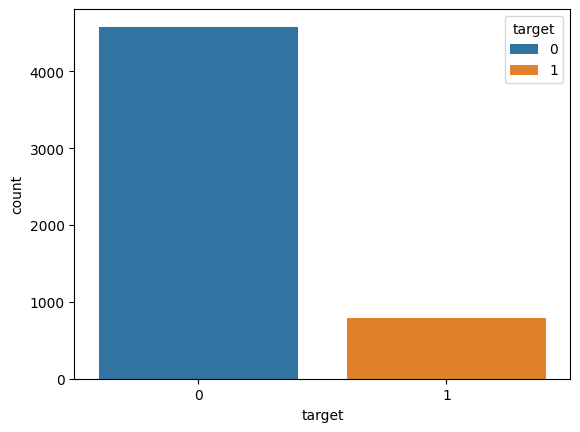

In [36]:
sns.countplot(x=df["target"],data=df,hue="target")

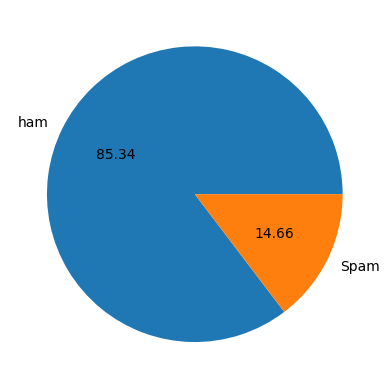

In [37]:
plt.pie(df["target"].value_counts(),labels=["ham","Spam"],autopct="%0.2f")
plt.show()

In [23]:
# data is imbalanced

In [45]:
!pip install nltk

In [46]:
import nltk

In [47]:
nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Raksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [48]:
df["num_characters"]=df["text"].apply(len)

C:\Users\Raksha\AppData\Local\Temp\ipykernel_14424\3309080630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"]=df["text"].apply(len)


In [49]:
df.head(4)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13


In [29]:
# numbere of words

In [50]:
df["text"].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5767    [Hi, team, ,, I, hope, everyone, is, doing, we...
5768    [Good, morning, ,, your, online, payment, of, ...
5769    [Hey, Rohan, ,, it, ’, s, been, a, while, sinc...
5770    [Dear, student, ,, your, registration, for, th...
5771    [Thank, you, for, shopping, with, us, ,, your,...
Name: text, Length: 5368, dtype: object

In [43]:
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Raksha\AppData\Local\Temp\ipykernel_14424\1558380898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [51]:
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [52]:
df["text"].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5767    [Hi team, I hope everyone is doing well, this ...
5768    [Good morning, your online payment of ?1,200 f...
5769    [Hey Rohan, it’s been a while since we met, I ...
5770    [Dear student, your registration for the upcom...
5771    [Thank you for shopping with us, your order ha...
Name: text, Length: 5368, dtype: object

In [53]:
df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Raksha\AppData\Local\Temp\ipykernel_14424\4263227907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [54]:
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [55]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5368.000000,5368.000000,5368.000000
mean,79.174739,18.370343,1.946162
std,58.344147,13.260443,1.428466
min,2.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,62.000000,15.000000,1.000000
75%,114.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [56]:
# for the ham(not spam) messages
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4581.000000,4581.000000,4581.000000
mean,70.748308,17.133595,1.814888
std,56.542628,13.483584,1.375791
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [57]:
# for the spam messages
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,787.000000,787.000000,787.000000
mean,128.223634,25.569250,2.710292
std,42.328424,8.971327,1.489551
min,13.000000,2.000000,1.000000
25%,98.000000,18.000000,1.500000
50%,143.000000,27.000000,2.000000
75%,156.000000,32.000000,4.000000
max,431.000000,84.000000,9.000000


In [58]:
# we understhood that the spam messages have more number of thr charachters 
# , number od words and sentences used than in non spam messages from the above

<Axes: xlabel='num_characters', ylabel='Count'>

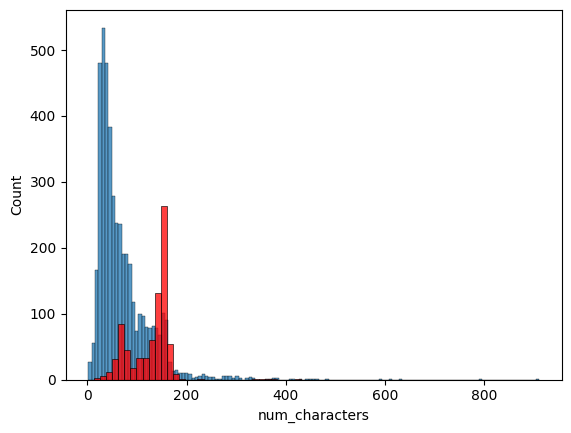

In [59]:
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

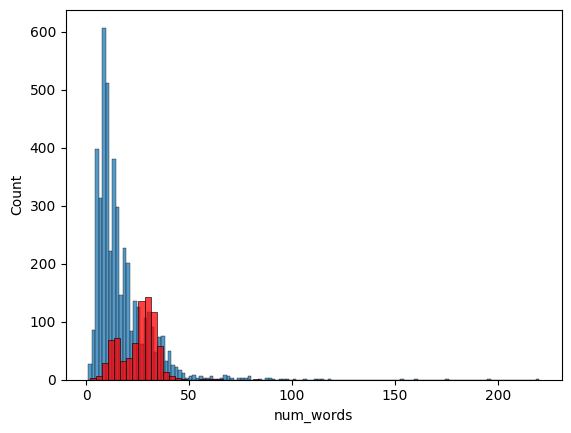

In [60]:
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

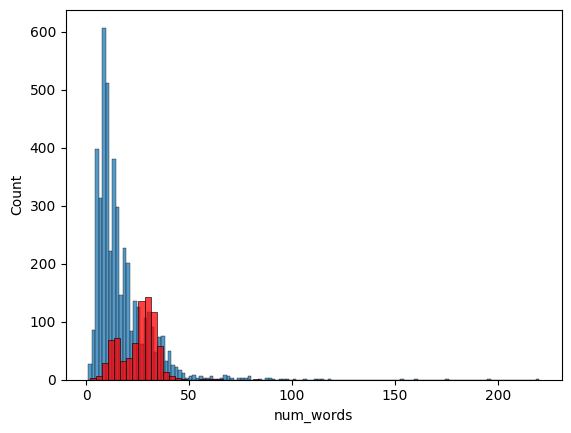

In [61]:
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color="red")

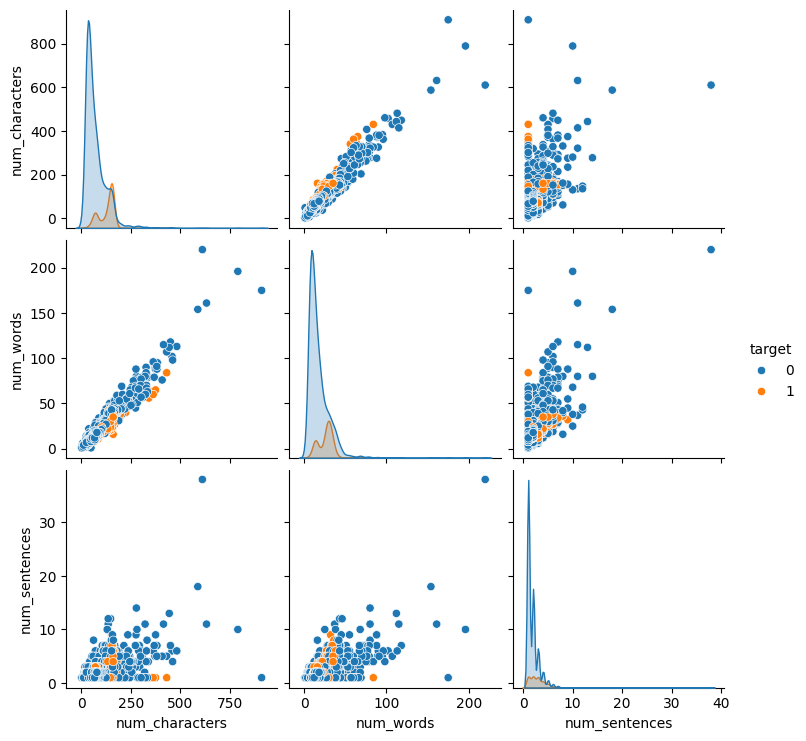

In [62]:
sns.pairplot(df,hue="target")

<Axes: >

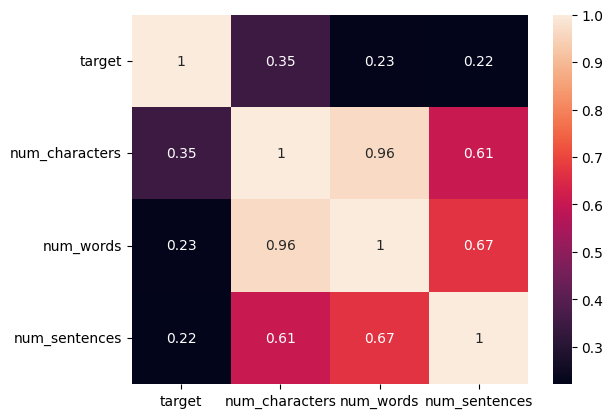

In [63]:
sns.heatmap(df.corr(numeric_only=True),annot=True)


# 3. Data Preprocessing
### Lower case
### Tokenization
### Removing special characters
### Removing stop words and punctuation
### Stemming

In [64]:
def transform_text(text):
    text=text.lower()
    # for tokenization
    text=nltk.word_tokenize(text)
    # remove special charachters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    # for removeing stopwords and punctuations
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    # steming
    text=y[:]
    y.clear()
    for i in text:
       y.append(ps.stem(i))
    return " ".join(y)

In [65]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [67]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [68]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dancing")

'danc'

In [69]:
transform_text("Hi how ARE You %% eg!!! 123 hh% tharunm did you is they danceing danced cookeing")

'hi eg 123 hh tharunm danc danc cook'

In [70]:
df["transformed_text"]=df["text"].apply(transform_text)

C:\Users\Raksha\AppData\Local\Temp\ipykernel_14424\958737439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"]=df["text"].apply(transform_text)


In [71]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
# word cloud of spam and harm
!pip install wordcloud

In [72]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [73]:
spam_text = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")
spam_wc = wc.generate(spam_text)


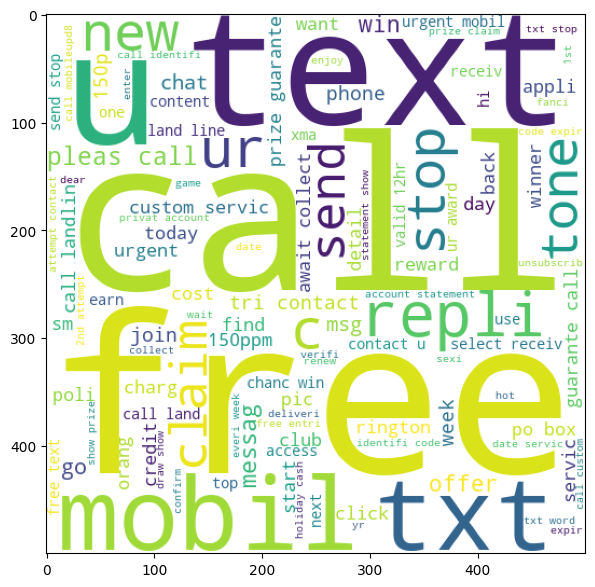

In [74]:
plt.figure(figsize=(15,7))
plt.imshow(spam_wc)

In [75]:
ham_text = df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")
ham_wc = wc.generate(ham_text)


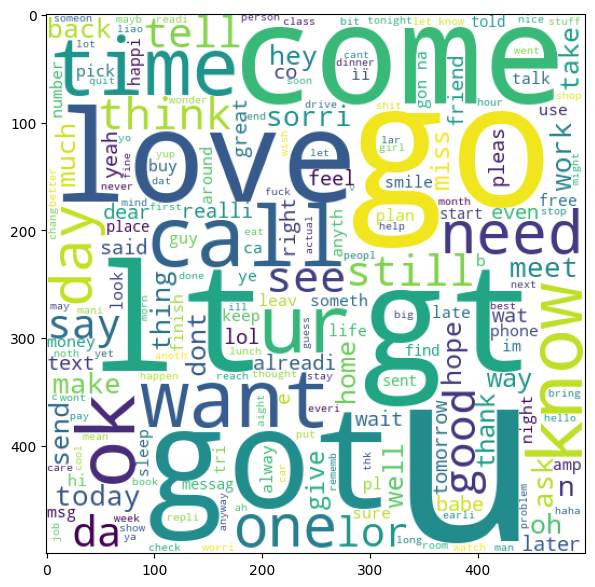

In [76]:
plt.figure(figsize=(15,7))
plt.imshow(ham_wc)

In [77]:
spam_corpus=[]
for msg in df[df['target']==1]["transformed_text"].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [78]:
len(spam_corpus)

11051

C:\Users\Raksha\AppData\Local\Temp\ipykernel_14424\3552302959.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


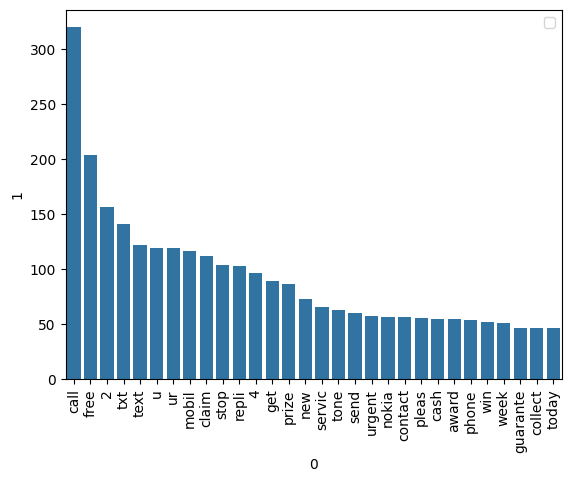

In [79]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.legend()
plt.show()

In [80]:
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,320
1,free,204
2,2,157
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,117
8,claim,112
9,stop,104


In [81]:
ham_corpus=[]
for msg in df[df['target']==0]["transformed_text"].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [82]:
len(ham_corpus)

35960

C:\Users\Raksha\AppData\Local\Temp\ipykernel_14424\4179879650.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


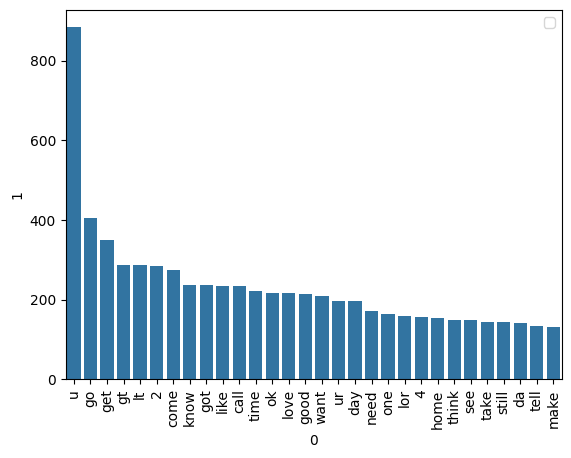

In [83]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.legend()
plt.show()

# Model Building

In [84]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [85]:
X=tfidf.fit_transform(df["transformed_text"]).toarray()

In [86]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5368, 6831))

In [87]:
y=df['target'].values

In [88]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5368,))

In [89]:
from sklearn.model_selection import train_test_split


In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.model_selection import cross_val_score

In [92]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [93]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
scores_raw = cross_val_score(gnb, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-validation accuracy (Actual):", scores_raw.mean() * 100)


83.14711359404097
[[764 151]
 [ 30 129]]
0.4607142857142857
Cross-validation accuracy (Actual): 85.44511302650838


In [94]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
scores_raw = cross_val_score(mnb, X_train, y_train, cv=20, scoring='accuracy')
print("Cross-validation accuracy (Actual):", scores_raw.mean() * 100)


95.62383612662943
[[915   0]
 [ 47 112]]
1.0
Cross-validation accuracy (Actual): 94.71267115844381


In [97]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
scores_raw = cross_val_score(bnb, X_train, y_train, cv=20, scoring='accuracy')
print("Cross-validation accuracy (Actual):", scores_raw.mean() * 100)


97.76536312849163
[[911   4]
 [ 20 139]]
0.972027972027972
Cross-validation accuracy (Actual): 97.13464464246904


In [78]:
# tfidf -> mnb

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [99]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [100]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
}

In [101]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [102]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9683426443202979, 0.9629629629629629)

In [103]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9683426443202979
Precision -  0.9629629629629629
For  KN
Accuracy -  0.888268156424581
Precision -  1.0
For  NB
Accuracy -  0.9692737430167597
Precision -  0.9921875
For  DT
Accuracy -  0.9236499068901304
Precision -  0.8969072164948454
For  LR
Accuracy -  0.946927374301676
Precision -  0.9396551724137931
For  RF
Accuracy -  0.9674115456238361
Precision -  0.9769230769230769
For  AdaBoost
Accuracy -  0.9115456238361266
Precision -  0.9


In [104]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [105]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.888268,1.000000
2,NB,0.969274,0.992188
5,RF,0.967412,0.976923
0,SVC,0.968343,0.962963
4,LR,0.946927,0.939655
6,AdaBoost,0.911546,0.900000
3,DT,0.923650,0.896907


In [106]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [107]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.888268
1,NB,Accuracy,0.969274
2,RF,Accuracy,0.967412
3,SVC,Accuracy,0.968343
4,LR,Accuracy,0.946927
5,AdaBoost,Accuracy,0.911546
6,DT,Accuracy,0.923650
7,KN,Precision,1.000000
8,NB,Precision,0.992188
9,RF,Precision,0.976923


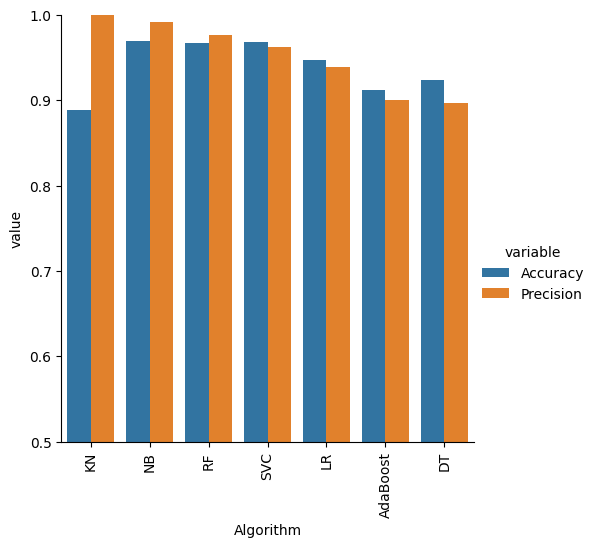

In [108]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [109]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [110]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [111]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [112]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [113]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [114]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [115]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.888268,1.000000,0.888268,1.000000,0.888268,1.000000,0.888268,1.000000
1,NB,0.969274,0.992188,0.969274,0.992188,0.969274,0.992188,0.969274,0.992188
2,RF,0.967412,0.976923,0.967412,0.976923,0.967412,0.976923,0.967412,0.976923
3,SVC,0.968343,0.962963,0.968343,0.962963,0.968343,0.962963,0.968343,0.962963
4,LR,0.946927,0.939655,0.946927,0.939655,0.946927,0.939655,0.946927,0.939655
5,AdaBoost,0.911546,0.900000,0.911546,0.900000,0.911546,0.900000,0.911546,0.900000
6,DT,0.923650,0.896907,0.923650,0.896907,0.923650,0.896907,0.923650,0.896907


In [116]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
from sklearn.ensemble import VotingClassifier

In [117]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb),('rf',rfc)],voting='soft')

In [118]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [121]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748603351955307
Precision 0.9714285714285714


In [122]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb),('rf',rfc)]
final_estimator=RandomForestClassifier()

In [123]:
from sklearn.ensemble import StackingClassifier

In [124]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [133]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [125]:
import pickle
# pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
# pickle.dump(mnb,open('model1.pkl','wb'))

In [ ]:
# ============================================================
# 📦 IMPORTS
# ============================================================
import nltk
import string
import pickle
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# ============================================================
# 🧠 SETUP
# ============================================================
nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

# ============================================================
# 🔹 Your Exact Transformation Function
# ============================================================
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# ============================================================
# ⚙️ Custom Transformer to Use transform_text() in Pipeline
# ============================================================
class TransformTextWrapper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Apply your transform_text function to every message
        return X.apply(transform_text)

# ============================================================
# 📊 Load and Prepare Data
# ============================================================
df = pd.read_csv("spam.csv", encoding="cp1252")
df = df.drop_duplicates(keep='first')
df = df.rename(columns={'v1': 'target', 'v2': 'text'})
df = df[['text', 'target']]

# Encode target (ham=0, spam=1)
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================================
# 🧱 Build the Pipeline
# ============================================================
spam_pipeline = Pipeline([
    ('preprocess', TransformTextWrapper()),              # your transformation
    ('vectorizer', TfidfVectorizer(max_features=3000)),  # TF-IDF feature extraction
    ('classifier', MultinomialNB())                      # classifier
])
# ============================================================
# 🏋️‍♂️ Train the Model
# ============================================================
spam_pipeline.fit(X_train, y_train)

# ============================================================
# 📈 Evaluate Performance
# ============================================================
y_pred = spam_pipeline.predict(X_test)
print("\n✅ Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("✅ Precision:", round(precision_score(y_test, y_pred) * 100, 2), "%")
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
cv_score = cross_val_score(spam_pipeline, X_train, y_train, cv=5).mean()
print("✅ Cross-validation Accuracy:", round(cv_score * 100, 2), "%")
# ============================================================
# 💾 Save the Trained Pipeline
# ============================================================
pickle.dump(spam_pipeline, open('spam_detection_pipeline_final.pkl', 'wb'))
print("\n Model pipeline saved as spam_detection_pipeline_final.pkl")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



✅ Accuracy: 95.44 %
✅ Precision: 98.55 %
✅ Confusion Matrix:
 [[889   2]
 [ 47 136]]
✅ Cross-validation Accuracy: 95.83 %

🎉 Model pipeline saved as spam_detection_pipeline_final.pkl


In [181]:
spam_pipeline

,steps,"[('preprocess', ...), ('vectorizer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [188]:
sample_message="Your Apple ID has been locked. Reset password immediately to avoid permanent suspension."

In [189]:
pred = spam_pipeline.predict(pd.Series([sample_message]))[0]
print("\n📩 Sample Message Prediction:", "🚨 Spam" if pred == 1 else "✅ Not Spam")


📩 Sample Message Prediction: 🚨 Spam


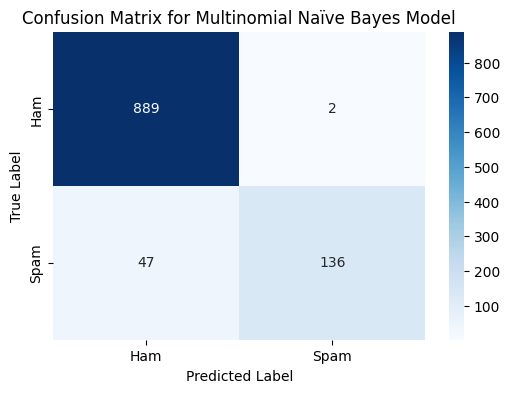

Accuracy: 95.44%
Precision: 98.55%
Recall: 74.32%
F1 Score: 84.74%

Classification Report:
               precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       891
        Spam       0.99      0.74      0.85       183

    accuracy                           0.95      1074
   macro avg       0.97      0.87      0.91      1074
weighted avg       0.96      0.95      0.95      1074



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate predictions
y_pred = spam_pipeline.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Multinomial Naïve Bayes Model')
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))



Model Evaluation Summary (Multinomial Naïve Bayes):

   Metric  Value (%)
 Accuracy      95.44
Precision      98.55
   Recall      74.32
 F1 Score      84.74


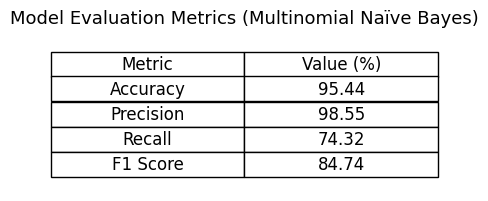

In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict using your trained pipeline
y_pred = spam_pipeline.predict(X_test)

# Calculate metrics
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision = round(precision_score(y_test, y_pred) * 100, 2)
recall = round(recall_score(y_test, y_pred) * 100, 2)
f1 = round(f1_score(y_test, y_pred) * 100, 2)

# Create a DataFrame for better presentation
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value (%)": [accuracy, precision, recall, f1]
})

# Print the metrics table
print("\nModel Evaluation Summary (Multinomial Naïve Bayes):\n")
print(metrics_df.to_string(index=False))

# Optional: If you want to visualize it as a table image
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 2))
ax.axis('off')
table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
plt.title("Model Evaluation Metrics (Multinomial Naïve Bayes)", fontsize=13, pad=10)
plt.show()
